## 1. Understand the data.
<p>In this assignment, you will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: condo price prediction. This lab will provide you with hands-on experience in building and evaluating machine learning models using Python and popular libraries such as scikit-learn.</p>
<p>Step 1: As usual, understanding the data is the first step of your machine learning project.</p>

In [ ]:
# Importing the pandas package
import pandas as pd

# Reading in condo_price_cm.csv, which is comma delimited.
df=pd.read_csv('20_record_per_town.csv')

# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()

(520, 8)
Index(['closest_mrt_dist', 'cbd_dist', 'town', 'storey_range',
       'floor_area_sqm', 'flat_model', 'resale_price', 'years_remaining'],
      dtype='object')
Index(['closest_mrt_dist', 'cbd_dist', 'town', 'storey_range',
       'floor_area_sqm', 'flat_model', 'resale_price', 'years_remaining'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   closest_mrt_dist  520 non-null    float64
 1   cbd_dist          520 non-null    float64
 2   town              520 non-null    object 
 3   storey_range      520 non-null    object 
 4   floor_area_sqm    520 non-null    int64  
 5   flat_model        520 non-null    object 
 6   resale_price      520 non-null    float64
 7   years_remaining   520 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.6+ KB


## 2. Data Splitting
<p>Data splitting, also known as data partitioning or data splitting, is a crucial step in machine learning model development. It involves dividing a dataset into multiple subsets for different purposes, typically training and testing/validation. </p>


In [ ]:
# select the dependent and target
numerical_features = ['floor_area_sqm', 'years_remaining', 'closest_mrt_dist', 'cbd_dist']
categorical_features = ['storey_range', 'flat_model', 'town']
# sel_feature = ['closest_mrt_dist', 'cbd_dist', 'floor_area_sqm']
X=df[numerical_features + categorical_features]
y=df['resale_price']

# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)


(364, 5) (156, 5)


## 3. Use scikit-learn pipeline
<p>Pipelines allow for the seamless integration of multiple preprocessing steps (e.g., feature scaling, imputation) and the model training process into a single object. This simplifies the overall workflow and reduces the likelihood of errors or inconsistencies in data preprocessing and modeling steps.</p>

One-Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

steps = [('preprocessor', preprocessor),
         ('poly', PolynomialFeatures(degree = 2,
                                     include_bias=False)),
         ('liReg', LinearRegression())]

# steps = [('scaler', StandardScaler()),
#          ('poly', PolynomialFeatures(degree = 5,
#                                      include_bias=False)),
#          ('liReg', LinearRegression())]

parameters = {"poly__degree":[1, 2, 3]}
pipeline = Pipeline(steps)

poly_grid = GridSearchCV(pipeline, parameters,
                         cv=5,
                         scoring='r2',
                         verbose= True,
                         n_jobs=-1)

poly_grid.fit(X_train, y_train)
# pipeline.fit(X_train, y_train)



Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['floor_area_sqm',
                                                                          'closest_mrt_dist']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['storey_range',
                                                                          'flat_model',
                                                                          'town'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('liReg', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': [1, 2, 3]}, scoring='r2',
             verbose=True)

Label Encoding

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', Pipeline([
            ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
            ('imputer', SimpleImputer(strategy='constant', fill_value=-1))
        ]), categorical_features)
    ])

steps = [('preprocessor', preprocessor),
         ('poly', PolynomialFeatures(degree = 1,
                                     include_bias=False)),
         ('liReg', LinearRegression())]

# steps = [('scaler', StandardScaler()),
#          ('poly', PolynomialFeatures(degree = 5,
#                                      include_bias=False)),
#          ('liReg', LinearRegression())]

parameters = {"poly__degree":[1, 2, 3]}
pipeline = Pipeline(steps)


poly_grid = GridSearchCV(pipeline, parameters,
                         cv=10,
                         scoring='r2',
                         verbose= True,
                         n_jobs=-1)

poly_grid.fit(X_train, y_train)



Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['floor_area_sqm',
                                                                          'years_remaining',
                                                                          'closest_mrt_dist',
                                                                          'cbd_dist']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1)),
                                                                                         ('imputer',
                                                                                          SimpleImputer(fill_value=-1,
                                                                                                        strategy='constant'))]),
                                                                         ['storey_range',
                                                                          'flat_model',
                                                                          'town'])])),
                                       ('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': [1, 2, 3]}, scoring='r2',
             verbose=True)

Linear

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', Pipeline([

#             ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
#             ('imputer', SimpleImputer(strategy='constant', fill_value=-1))
#         ]), categorical_features)
#     ])

steps = [('preprocessor', preprocessor),
         ('lr', LinearRegression())]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

#parameter checking
# Extract the linear regression model from the pipeline
best_lr = pipeline.named_steps['lr']

# Get the coefficients and intercept from the fitted linear regression model
best_parameters = {'coefficients': best_lr.coef_, 'intercept': best_lr.intercept_}

# Print the values of the parameters
print(best_parameters)

# predict the sales for the testing data
ytest_pred = pipeline.predict(X_test)

#predict the sales for the training data
ytrain_pred = pipeline.predict(X_train)

# lr = LinearRegression()
# best_parameters = [lr.coef_, lr.intercept_]

# print the values of the parameters
# print(best_parameters)

{'coefficients': array([ 126546.32086671,   72253.11974233,  -32034.96779277,
        -64363.52893266, -114595.79670713, -121606.74793461,
        -99965.13367781,  -89462.48437887,  -59304.16371542,
        -50113.6926143 ,   36212.80503533,  -42647.63671839,
         74419.84588859,   54698.22659498,  196877.82097684,
        -73337.08972546,  128392.5822372 ,  160431.46473907,
        -58034.02278939,  -35009.36609107,   82382.03053765,
        -68876.79737457,  -11610.80383814,  -65082.23234682,
         55811.98030636,  -45973.98532273, -102454.73285314,
         30625.03517088,  -49114.94923446,   -6855.35350142,
         52919.33678849,  221273.86054837,  -41139.27389739,
          9070.01447069,   68692.68514138,  -19275.45212301,
        -28046.39887795,  -65900.23193272,  161861.7569083 ,
        -19047.10161453,  -81504.44353226,   30994.7892638 ,
        -32203.36252466,  -65631.1195096 ,    6621.37023233,
          6046.37569301,  -33211.09656247,  204811.11108229,
       

## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [ ]:
best_parameters = poly_grid.best_params_

# print the values of the parameters
print ('best order is :', best_parameters)



best order is : {'poly__degree': 1}


## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the function <b>predict</b> from Python scikit-learn moduel</p>

In [ ]:
# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on the best parameters.</p>

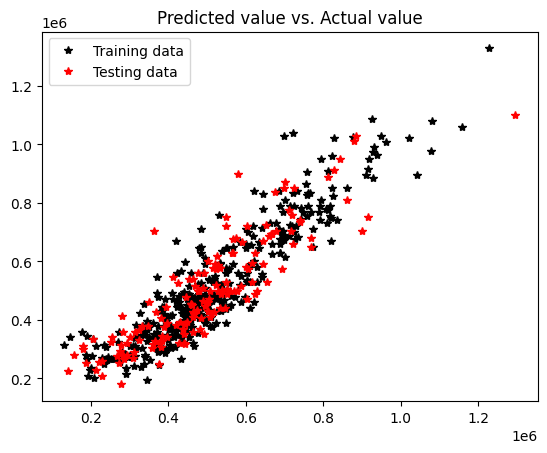

In [ ]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'k*')
plt.plot(ytest_pred,  y_test, 'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()

## 7. Evaluate the results using metrics

<p>Evaluating the performance of the trained linear regression model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance. </p>
<p>The model's performance should be evaluated on both the trained data and test data sets for ensuring model effectiveness and generalization ability.</p>

In [ ]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  62668.440717556055
Mean squared error:  6616568262.809296
R2 score is:  0.8408419702024751
Mean absolute error:  71041.53381582782
Mean squared error:  7931942492.733051
R2 score is:  0.770216495875234


In [ ]:
import numpy as np
np.mean(y_test)

701172.0341880342

## 8. Submit for the grade.
<p>Change the below cell code for the final submission</p>

In [ ]:
# Edit the below code to submit.
import pandas as pd
name = "Nay Win Hlaing"
print("Submitted by", name)

poly_mse_all_features = [0, 0] # train_score, test_score
poly_mae_all_features = [0, 0] # train_score, test_score
best_degree_all_features = 5 # change to yours

linear_mse_all_features = [0, 0] # train_score, test_score
linear_mae_all_features = [0, 0] # train_score, test_score

selected_feautres = ['TV', 'radio'] # change your selections
poly_mse_sel_fea = [0, 0] # train_score, test_score
poly_mae_sel_fea = [0, 0] # train_score, test_score
best_degree_sel_features = 0 # change to yours

linear_mse_sel_fea = [0, 0] # train_score, test_score
linear_mae_sel_fea = [0, 0] # train_score, test_score


## do not change the below codes:
print(f"The best poly degree using all featurs is {best_degree_all_features}")
print(f"The features selected are: {selected_feautres}")
print(f"The best degree using selected featurs is {best_degree_sel_features}")
variable_names = [
    "poly_mse_all_features",
    "poly_mae_all_features",
    "linear_mse_all_features",
    "linear_mae_all_features",
    "poly_mse_sel_fea",
    "poly_mae_sel_fea",
    "linear_mse_sel_fea",
    "linear_mae_sel_fea"
]

values  = [globals()[name] for name in variable_names]
tr_result = [val[0] for val in values]
test_result =  [val[1] for val in values]
df = pd.DataFrame(index = variable_names)
df['Train']= tr_result
df['Test']= test_result